In [273]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt

In [274]:
attacks_cleaned = pd.read_csv('/Users/laurasg/Documents/Ironhack_data/PR02-project-pandas/attacks.csv', encoding = "ISO-8859-1")

In [275]:
attacks_cleaned

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,...,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,...,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,...,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25718,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25719,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25720,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25721,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [276]:
#Checking the shape of the df before making any changes
attacks_cleaned.shape

(25723, 24)

In [277]:
#Checking Columns names
attacks_cleaned.columns

Index(['Case Number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Name', 'Sex ', 'Age', 'Injury', 'Fatal (Y/N)', 'Time',
       'Species ', 'Investigator or Source', 'pdf', 'href formula', 'href',
       'Case Number.1', 'Case Number.2', 'original order', 'Unnamed: 22',
       'Unnamed: 23'],
      dtype='object')

In [278]:
#Removing NAN rows
attacks_cleaned = attacks_cleaned.dropna(axis=0,how="all")


In [279]:
attacks_cleaned.shape

(8703, 24)

In [280]:
#Check if there are any duplicated columns
attacks_cleaned.columns.duplicated()


array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False])

In [281]:
#Removing "duplicated" columns
attacks_cleaned = attacks_cleaned.drop(['Case Number.1', 'Case Number.2'], axis=1)

In [282]:
attacks_cleaned.shape

(8703, 22)

In [283]:
attacks_cleaned.head()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,original order,Unnamed: 22,Unnamed: 23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,...,N,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,...,N,14h00 -15h00,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,...,N,07h45,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,6301.0,NaN,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,...,N,NaN,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,6300.0,NaN,NaN
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,...,N,NaN,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,6299.0,NaN,NaN


In [284]:
#Removing NAN columns
attacks_cleaned = attacks.dropna(axis=1, how="any", thresh= 3)

In [285]:
attacks_cleaned.shape

(7965, 21)

In [286]:
attacks_cleaned.head()

,Unnamed: 0,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,...,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,original order
0,0,2015.07-10,10-Jul-2015,2015.0,Unprovoked,USA,California,"Huntington Beach, Orange County",Surfing,Danny Miskin,...,38,"No injury, shark bumped & damaged board",N,08h45,"White shark, 7'","KTLA, 7/10/2015",2015.07.10-Miskin.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,5913.0
1,1,2015.07.08,08-Jul-2015,2015.0,Invalid,USA,California,"Huntington Beach, Orange County",Treading water,Eugene Finney,...,39,Laceration to back,NaN,NaN,Shark involvement not cofirmed,"Sentinel & Enterprise.com, 10/4/2015",2015.07.08-Finney.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,5912.0
2,2,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,...,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,6303.0
3,3,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,AdysonÃ¯Â¿Â½McNeely,...,11,Minor injury to left thigh,N,14h00 -15h00,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,6302.0
4,4,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,...,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,6301.0


# Analyzing columns

## Type

In [287]:
#Checking Type column
attacks_cleaned["Type"]

0       Unprovoked
1          Invalid
2          Boating
3       Unprovoked
4          Invalid
           ...    
7960           NaN
7961           NaN
7962           NaN
7963           NaN
7964           NaN
Name: Type, Length: 7965, dtype: object

In [288]:
#Unique values in column Type
attacks_cleaned["Type"].unique()

array(['Unprovoked', 'Invalid', 'Boating', 'Provoked', 'Questionable',
       'Sea Disaster', nan], dtype=object)

In [289]:
#Unifying Boat type
attacks_cleaned["Type"]= attacks_cleaned["Type"].str.replace("^Boat(\w+)?", "Boating")



In [290]:
attacks_cleaned["Type"].unique()

array(['Unprovoked', 'Invalid', 'Boating', 'Provoked', 'Questionable',
       'Sea Disaster', nan], dtype=object)

In [291]:
#Counting values for each type of accident
attacks_cleaned.Type.value_counts()


Unprovoked      4045
Provoked         539
Invalid          477
Boating          312
Sea Disaster     186
Questionable       2
Name: Type, dtype: int64

##  Activity

In [292]:
#Checking column Activity
attacks_cleaned["Activity"]

0              Surfing
1       Treading water
2             Paddling
3             Standing
4              Surfing
             ...      
7960               NaN
7961               NaN
7962               NaN
7963               NaN
7964               NaN
Name: Activity, Length: 7965, dtype: object

In [293]:
#Unique columns in Activity
attacks_cleaned["Activity"].unique()

array(['Surfing', 'Treading water', 'Paddling', ..., 'Hunting seashells',
       ' ', 'Standing, gathering oysters'], dtype=object)

In [294]:
#First 15 Ativities in attacks
attacks_cleaned["Activity"].value_counts()[:15].index.tolist()

['Surfing',
 'Swimming',
 'Fishing',
 'Spearfishing',
 'Wading',
 'Diving',
 'Standing',
 'Snorkeling',
 'Scuba diving',
 'Bathing',
 'Body boarding',
 'Body surfing',
 'Swimming ',
 'Kayaking',
 'Treading water']

In [295]:
#First 10 Activities in attacks
attacks_cleaned["Activity"].value_counts()[:10] 

Surfing         968
Swimming        754
Fishing         379
Spearfishing    333
Wading          143
Diving          104
Standing         92
Snorkeling       88
Scuba diving     75
Bathing          75
Name: Activity, dtype: int64

In [296]:
#Attacks by Country
attacks_cleaned.groupby("Country").Country.agg(["count"]).sort_values("count", ascending=False)



,count
Country,
USA,2083
AUSTRALIA,1181
SOUTH AFRICA,549
PAPUA NEW GUINEA,130
BRAZIL,108
...,...
KUWAIT,1
JAVA,1
ITALY / CROATIA,1


## Attacks time series

In [297]:
#Removing dates before 1900
attacks_cleaned.drop(attacks_cleaned[attacks_cleaned.Year < 1900].index, inplace=True)

In [298]:
#Creating new dataframe with column "Year"
attacks_year= attacks_cleaned[["Year"]]

In [299]:
#Counting Attacks per Year
attacks_year['Attacks']= attacks_year["Year"].map(attacks_year["Year"].value_counts())

<ipython-input-299-9edf0ad3d4ed>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  attacks_year['Attacks']= attacks_year["Year"].map(attacks_year["Year"].value_counts())


<AxesSubplot:xlabel='Year'>

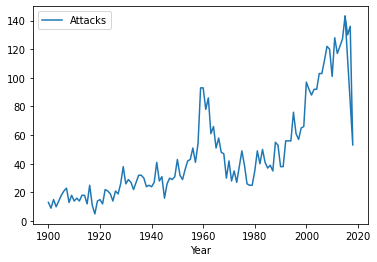

In [300]:
#Plot (time-series)
attacks_year.plot(x = "Year",y = "Attacks")

## Attacks per Country

In [301]:
#Grouping by Country
attacks_country= attacks_cleaned.groupby("Country").Country.agg(["count"]).sort_values("count", ascending=False)
attacks_country= attacks_country.rename(columns = {"count" : "Attacks"})

In [302]:
# First 5 Countries in attacks
attacks_5 = attacks_country.head()

<AxesSubplot:xlabel='Country'>

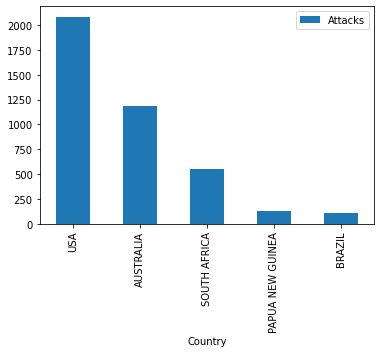

In [303]:
# Plot graph of Top 5 Countries in attacks 
attacks_5.plot(kind="bar")

# New dataframe with Countries Australia and USA

In [304]:
attacks_area = attacks_cleaned.loc[(attacks_cleaned['Country'] == "AUSTRALIA") |(attacks_cleaned['Country'] == "USA"), ['Country','Area', 'Year']]

In [305]:
attacks_area.shape

(3264, 3)

In [306]:
#Removing NA rows
attacks_area.dropna(axis=0, how='any', inplace=True)

In [307]:
attacks_area.shape

(3254, 3)

In [308]:
#Grouping Attacks by Country and Area
attacks_area = attacks_area.groupby(["Country", "Area"]).size().reset_index(name='Attacks')

In [309]:
attacks_area.sort_values("Attacks", ascending = False).reset_index(drop=True)

,Country,Area,Attacks
0,USA,Florida,1007
1,AUSTRALIA,New South Wales,423
2,USA,California,284
3,AUSTRALIA,Queensland,280
4,USA,Hawaii,275
5,AUSTRALIA,Western Australia,176
6,USA,South Carolina,141
7,AUSTRALIA,South Australia,93
8,USA,North Carolina,92
9,AUSTRALIA,Victoria,73


## New dataframe with Area California

In [310]:
attacks_area = attacks_cleaned.loc[(attacks['Country'] == "AUSTRALIA") |(attacks['Country'] == "USA"), ['Country','Area', 'Year']]

In [311]:
attacks_area_year = attacks_area.loc[(attacks_cleaned['Area'] == "California"), ['Area', 'Year']]

In [312]:
#Removing dates before 2000
attacks_area_year.drop(attacks_area_year[attacks_area_year.Year < 2000].index, inplace=True)

In [313]:
attacks_area_year['Attacks in California']= attacks_area_year["Year"].map(attacks_area_year["Year"].value_counts())

<AxesSubplot:xlabel='Year'>

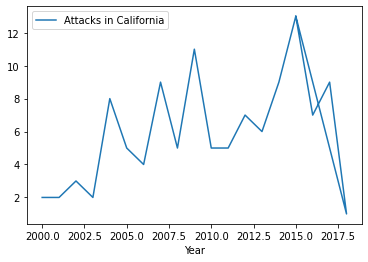

In [314]:
attacks_area_year.plot(x = "Year",y = "Attacks in California")


In [315]:
attacks_cleaned.to_csv('/Users/laurasg/Documents/Ironhack_data/PR02-project-pandas/attacks_cleaned.csv')

In [316]:
attacks_year.to_csv('/Users/laurasg/Documents/Ironhack_data/PR02-project-pandas/attacks_year.csv')

In [317]:
attacks_area_year.to_csv('/Users/laurasg/Documents/Ironhack_data/PR02-project-pandas/attacks_area_year.csv')

In [318]:
attacks_area.to_csv('/Users/laurasg/Documents/Ironhack_data/PR02-project-pandas/attacks_area.csv')